# Analyze Hyperparameter Tuning


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import sys
FILENAME = "f_KNN_MUTAG_TEST_2024-06-26_15-52-52_results.csv"

In [2]:

filepath= "configs/results/Hyperparameter_tuning_results/HP_20251014_GED-KNN_Letter-high.xlsx"

In [3]:

# # find the file in the directory
# filepath = None
# for root, dirs, files in os.walk("."):
#     if FILENAME in files:
#         filepath = os.path.join(root, FILENAME)
#         break


In [4]:
hyper_df = pd.read_excel(filepath)
display(len(hyper_df))
display(hyper_df.head(10))

250

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,fold_index
0,0.017294,0.001028,0.011425,0.000554,37,precomputed,4,distance,"{'leaf_size': 37, 'metric': 'precomputed', 'n_...",0.436551,0.450601,0.460336,0.450047,0.406948,0.440897,0.018586,11,0
1,0.017743,0.000137,0.011404,0.000291,21,precomputed,4,uniform,"{'leaf_size': 21, 'metric': 'precomputed', 'n_...",0.416184,0.420846,0.440095,0.439882,0.385513,0.420504,0.020012,22,0
2,0.014143,0.000636,0.036455,0.003442,32,euclidean,4,uniform,"{'leaf_size': 32, 'metric': 'euclidean', 'n_ne...",0.352482,0.351220,0.377300,0.362318,0.302020,0.349068,0.025308,39,0
3,0.016658,0.000538,0.009028,0.000473,27,precomputed,2,distance,"{'leaf_size': 27, 'metric': 'precomputed', 'n_...",0.466067,0.432587,0.452655,0.435097,0.419777,0.441237,0.016248,9,0
4,0.013487,0.000485,0.034089,0.000847,19,euclidean,1,uniform,"{'leaf_size': 19, 'metric': 'euclidean', 'n_ne...",0.311708,0.340561,0.363615,0.319783,0.296486,0.326430,0.023409,45,0
5,0.012768,0.000145,0.033285,0.000761,35,euclidean,4,distance,"{'leaf_size': 35, 'metric': 'euclidean', 'n_ne...",0.359584,0.351642,0.408647,0.354391,0.316689,0.358191,0.029419,34,0
6,0.014758,0.000137,0.009030,0.000063,18,precomputed,3,uniform,"{'leaf_size': 18, 'metric': 'precomputed', 'n_...",0.457650,0.381920,0.409722,0.436571,0.369963,0.411165,0.032745,25,0
7,0.014720,0.000077,0.010342,0.000433,34,precomputed,5,uniform,"{'leaf_size': 34, 'metric': 'precomputed', 'n_...",0.418737,0.425615,0.447829,0.444380,0.399433,0.427199,0.017697,15,0
8,0.014858,0.000235,0.010135,0.000311,34,precomputed,5,uniform,"{'leaf_size': 34, 'metric': 'precomputed', 'n_...",0.418737,0.425615,0.447829,0.444380,0.399433,0.427199,0.017697,15,0
9,0.014601,0.000043,0.007997,0.000033,23,precomputed,2,distance,"{'leaf_size': 23, 'metric': 'precomputed', 'n_...",0.466067,0.432587,0.452655,0.435097,0.419777,0.441237,0.016248,9,0


In [5]:
results_column ="mean_test_score"

In [6]:
# a function that gets two column names form the df, one result column, which represents the score, and one regarding a certain hyperparameter.
# this second parameter, can be categorical or numerical.
# if its categorical, i want a box plot, plotting the mean and max score for each category
# if its numerical, i want a scatter plot, plotting the score against the hyperparameter value
def plot_hyperparameter_effect(hyper_df, hyperparameter_column, results_column, Model_Name):
    if hyperparameter_column not in hyper_df.columns:
        print(f"Column {hyperparameter_column} not found in DataFrame.")
        return
    if results_column not in hyper_df.columns:
        print(f"Column {results_column} not found in DataFrame.")
        return

    # check if the hyperparameter column is numerical or categorical
    plt.figure(figsize=(10, 6))
    plt.title(f'{Model_Name} - Effect of {hyperparameter_column} on {results_column}')

    if pd.api.types.is_numeric_dtype(hyper_df[hyperparameter_column]):
        # numerical, scatter plot
        
        sns.scatterplot(data=hyper_df, x=hyperparameter_column, y=results_column)
        # add a line plot for better visibility
        sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, errorbar=None, color='orange')
        sns.regplot(data=hyper_df, x=hyperparameter_column, y=results_column, scatter=False, color='green', label='Trend Line')
        plt.xlabel(hyperparameter_column)
        plt.ylabel(results_column)
        plt.grid(True)
        plt.show()
    else:
        # categorical, bor plot
        # summary_df = hyper_df.groupby(hyperparameter_column)[results_column].agg(['mean', 'max']).reset_index()
        # summary_df = summary_df.melt(id_vars=hyperparameter_column, value_vars=['mean', 'max'], var_name='Statistic', value_name='Score')

        # Use violinplot for richer distribution visualization
        sns.violinplot(data=hyper_df, x=hyperparameter_column, y=results_column, inner="box", density_norm='width')
        # Overlay mean and max points for each category
        summary_df = hyper_df.groupby(hyperparameter_column)[results_column].agg(['mean', 'max']).reset_index()
        sns.scatterplot(data=summary_df, x=hyperparameter_column, y="mean", color="blue", label="Mean", marker="o", s=100, zorder=10)
        sns.scatterplot(data=summary_df, x=hyperparameter_column, y="max", color="red", label="Max", marker="X", s=100, zorder=10)
        plt.xlabel(hyperparameter_column)
        plt.ylabel(results_column)
        plt.legend(title='Statistic')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()

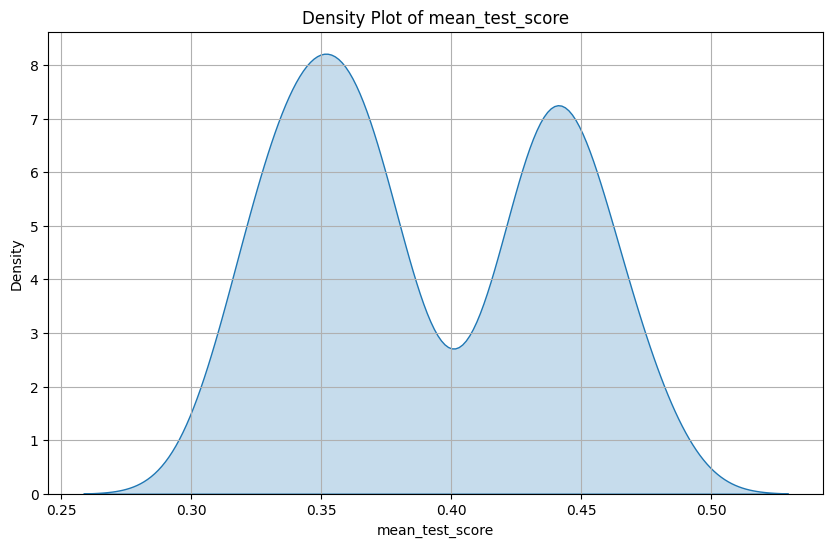

In [7]:
# plot the desity of the results collumn
plt.figure(figsize=(10, 6))
plt.title(f'Density Plot of {results_column}')
sns.kdeplot(data=hyper_df, x=results_column, fill=True)
plt.xlabel(results_column)
plt.ylabel('Density')
plt.grid(True)
plt.show()

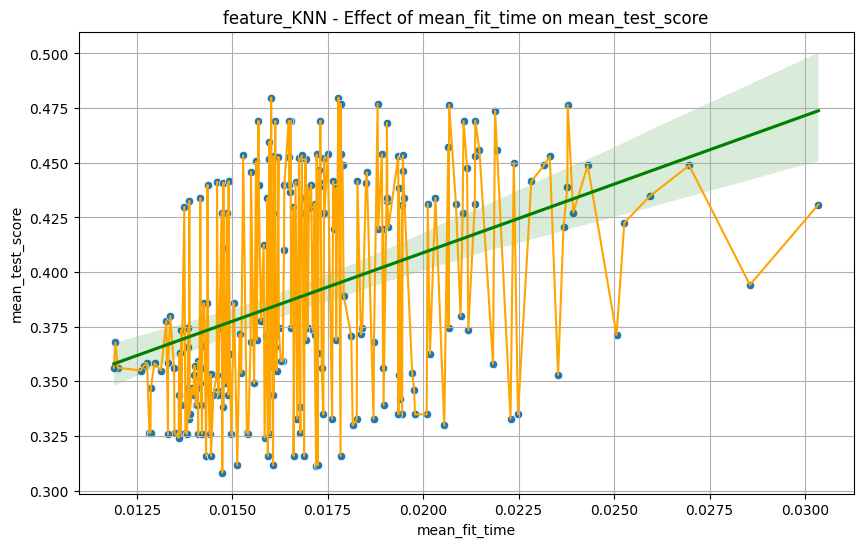

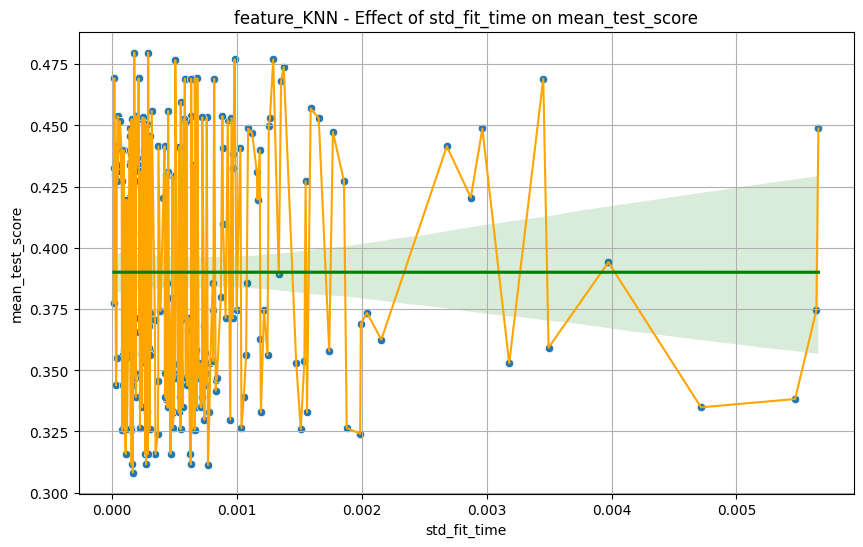

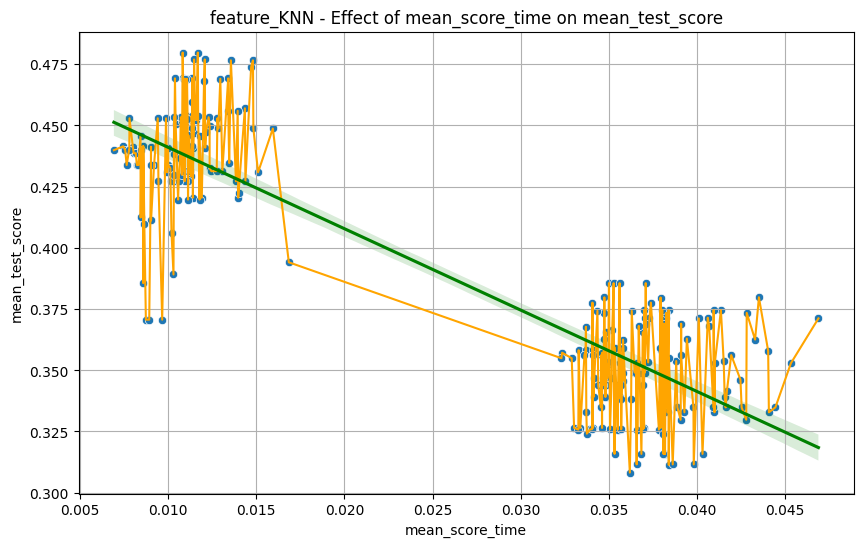

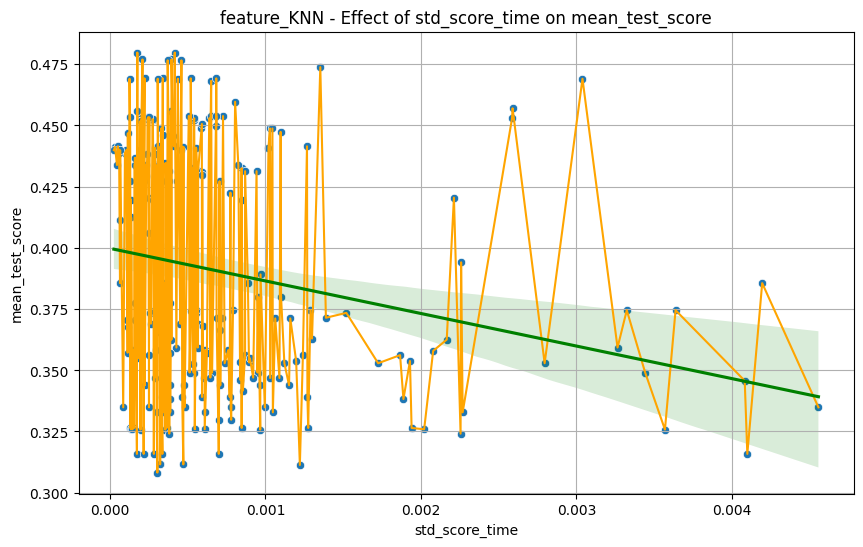

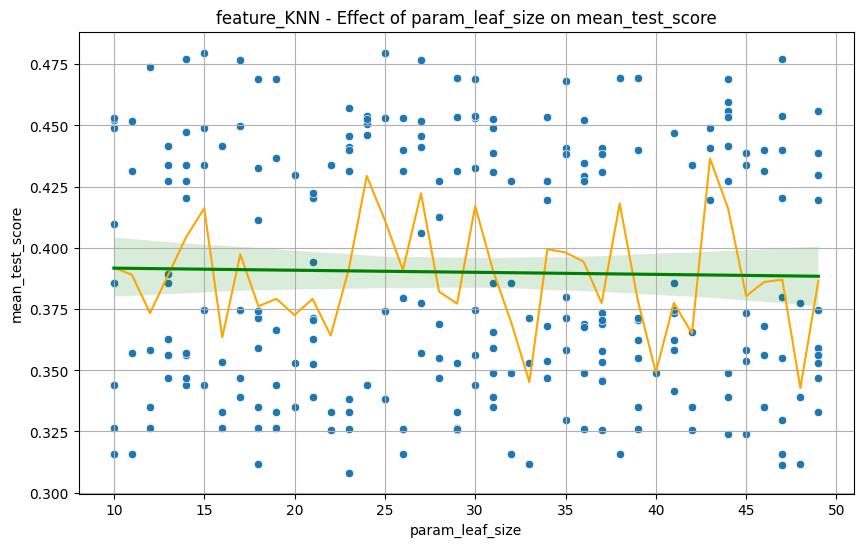

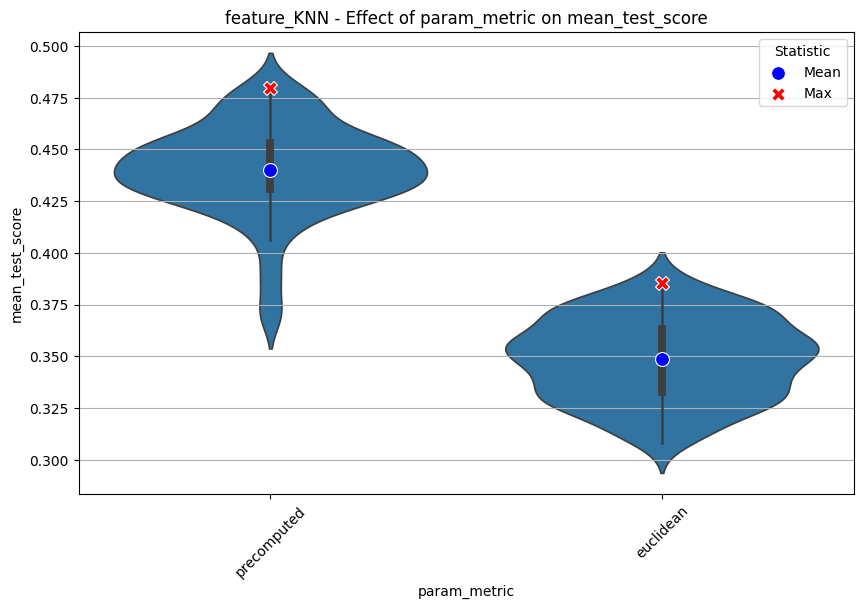

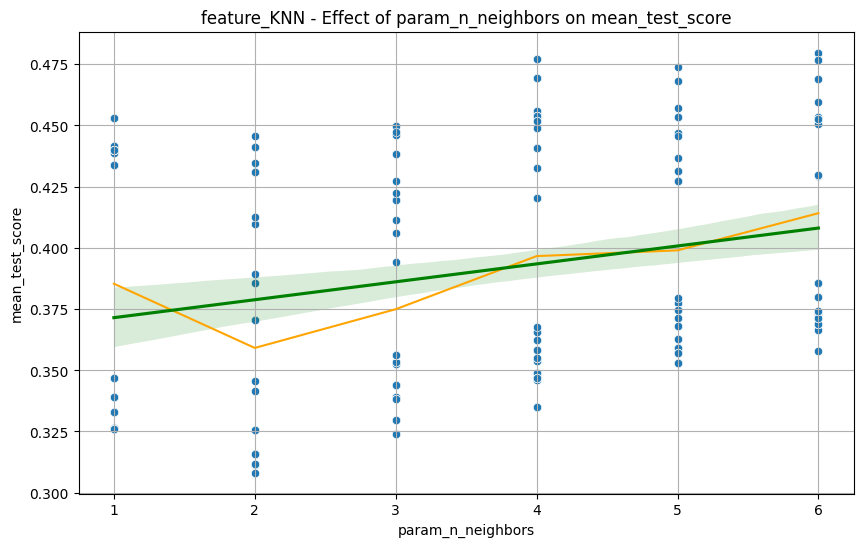

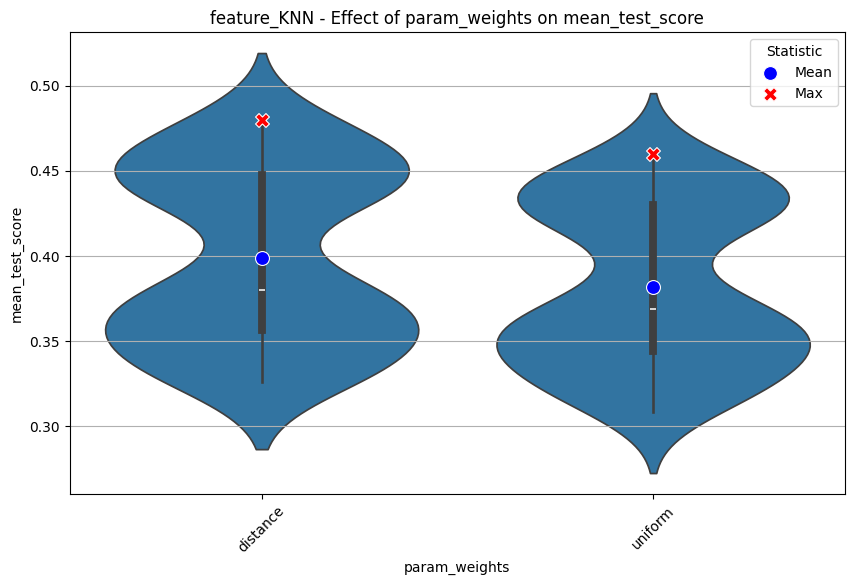

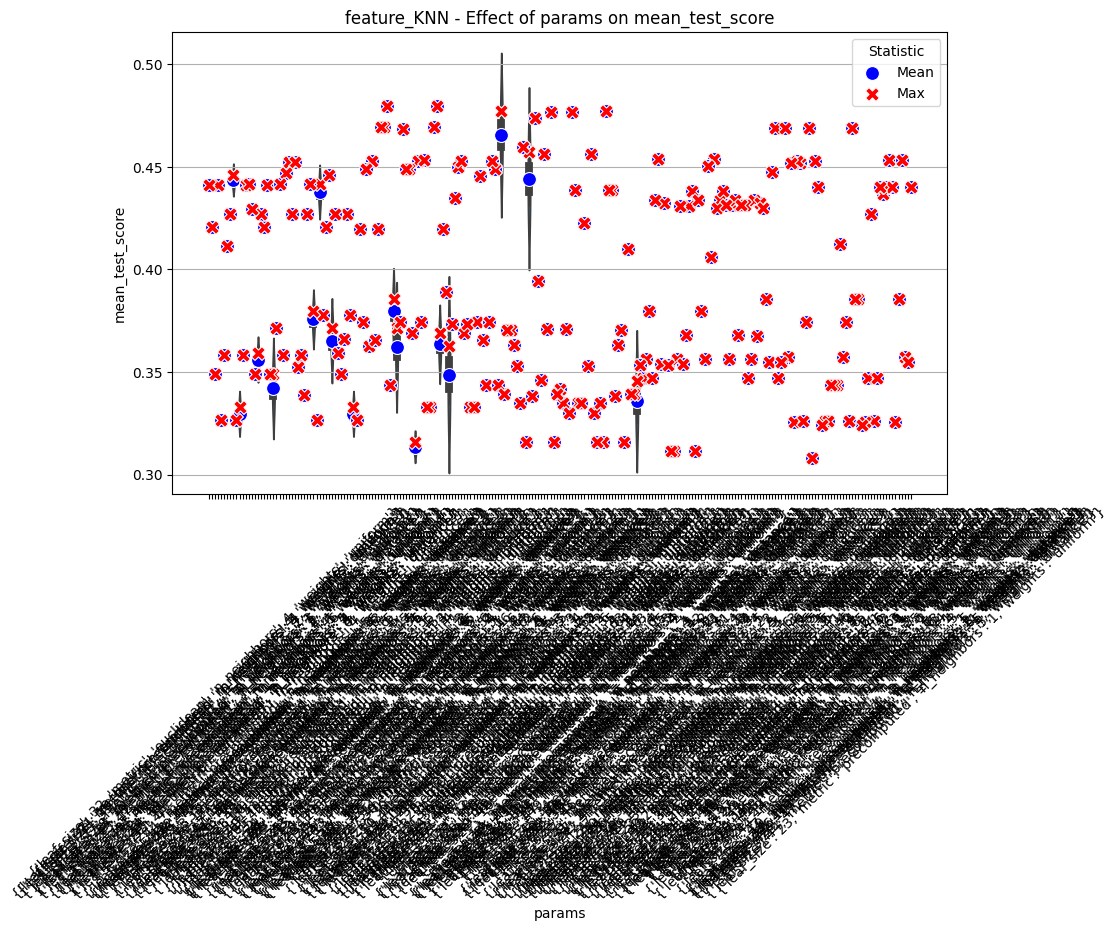

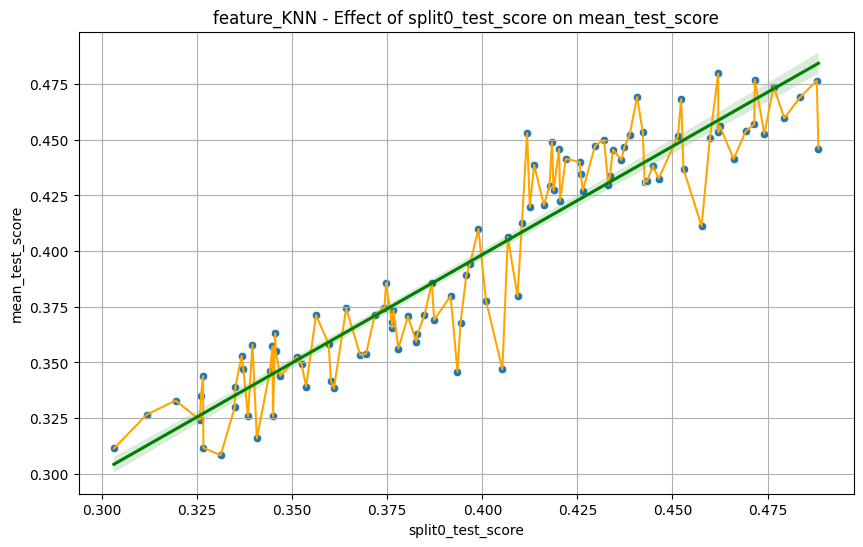

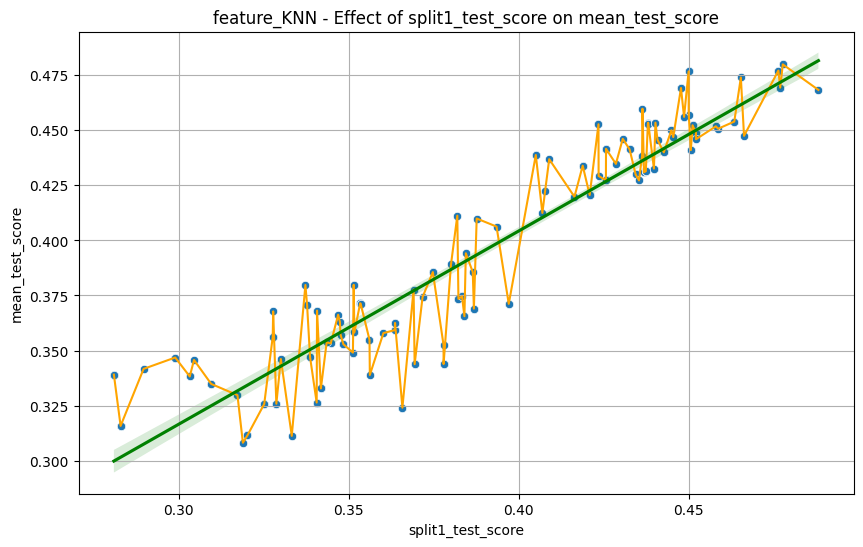

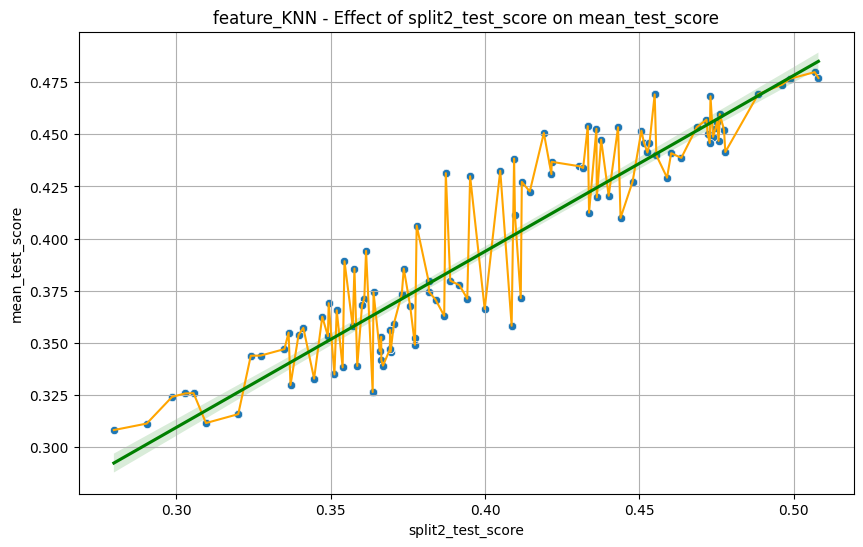

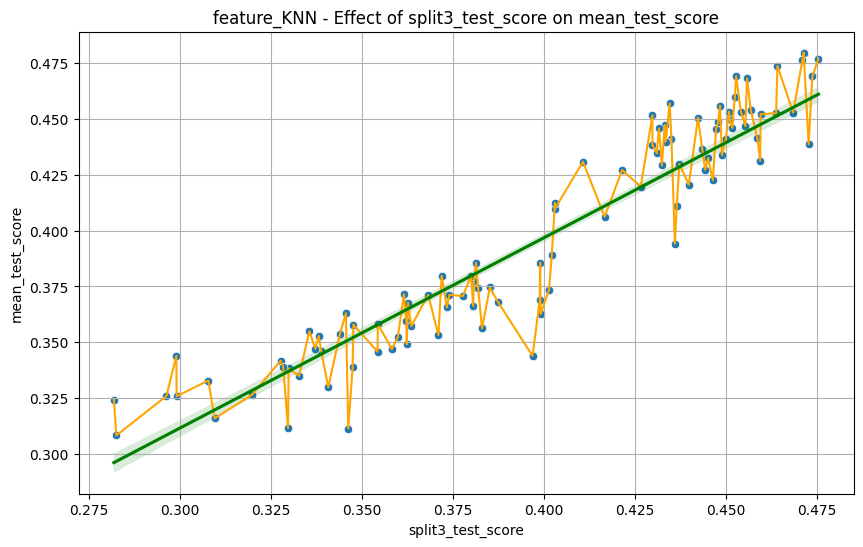

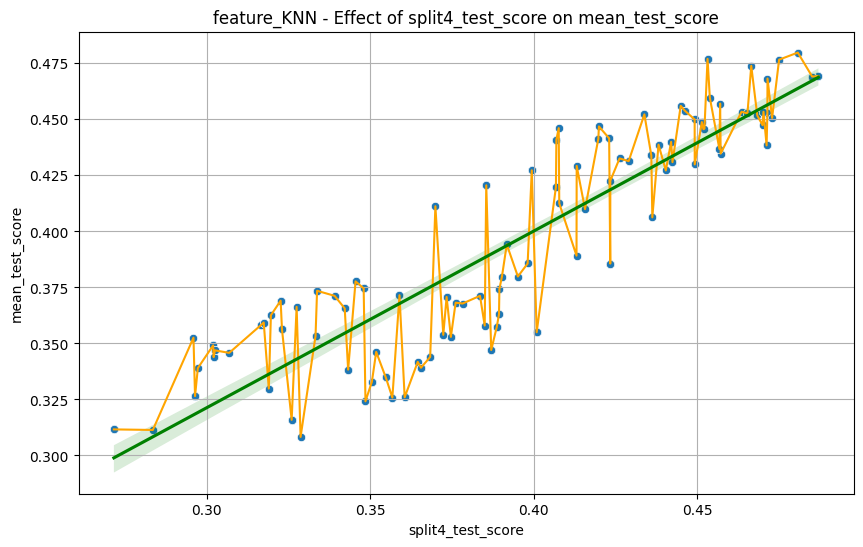

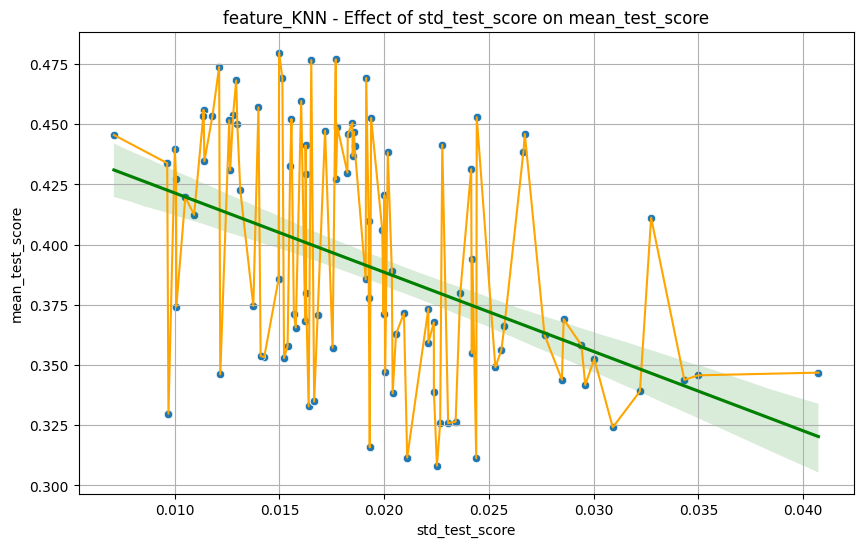

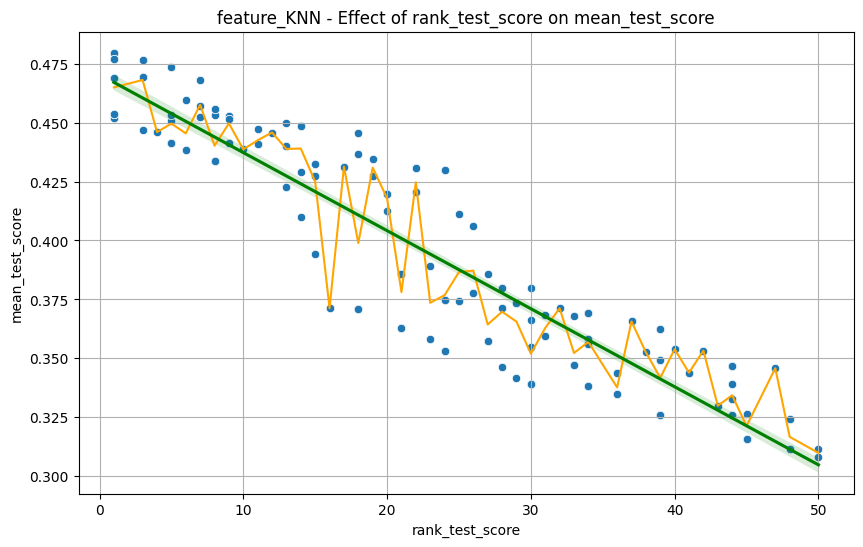

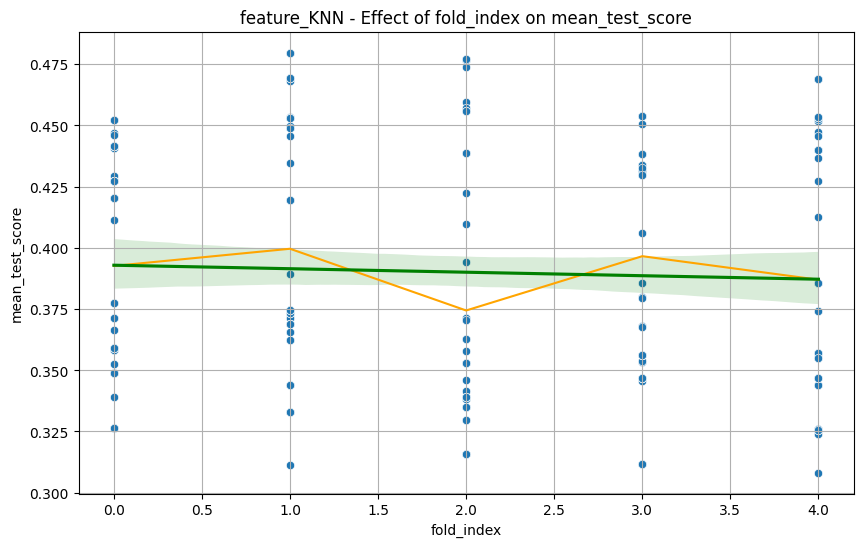

In [8]:
results_column = "mean_test_score"
Model_Name = "feature_KNN"

for col in hyper_df.columns:
    if col != results_column:
        plot_hyperparameter_effect(hyper_df, col, results_column, Model_Name)

In [9]:
display(hyper_df.sort_values(by='mean_test_score', ascending=False).head(30))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,fold_index
61,0.016019,0.000178,0.010824,0.000417,25,precomputed,6,distance,"{'leaf_size': 25, 'metric': 'precomputed', 'n_...",0.462036,0.477637,0.506846,0.471453,0.480755,0.479746,0.014982,1,1
77,0.017780,0.000290,0.011685,0.000176,15,precomputed,6,distance,"{'leaf_size': 15, 'metric': 'precomputed', 'n_...",0.462036,0.477637,0.506846,0.471453,0.480755,0.479746,0.014982,1,1
100,0.018807,0.001291,0.012079,0.000396,47,precomputed,4,distance,"{'leaf_size': 47, 'metric': 'precomputed', 'n_...",0.471643,0.476334,0.508065,0.475520,0.453165,0.476945,0.017689,1,2
138,0.017844,0.000982,0.011470,0.000210,14,precomputed,4,distance,"{'leaf_size': 14, 'metric': 'precomputed', 'n_...",0.471643,0.476334,0.508065,0.475520,0.453165,0.476945,0.017689,1,2
127,0.023785,0.000506,0.014811,0.000372,27,precomputed,6,distance,"{'leaf_size': 27, 'metric': 'precomputed', 'n_...",0.487957,0.449939,0.498788,0.471137,0.475038,0.476572,0.016519,3,2
119,0.020681,0.000507,0.013559,0.000460,17,precomputed,6,distance,"{'leaf_size': 17, 'metric': 'precomputed', 'n_...",0.487957,0.449939,0.498788,0.471137,0.475038,0.476572,0.016519,3,2
113,0.021883,0.001375,0.014707,0.001353,12,precomputed,5,distance,"{'leaf_size': 12, 'metric': 'precomputed', 'n_...",0.476605,0.465306,0.496387,0.464244,0.466528,0.473814,0.012119,5,2
60,0.015686,0.000018,0.010387,0.000223,29,precomputed,4,distance,"{'leaf_size': 29, 'metric': 'precomputed', 'n_...",0.440682,0.476883,0.488563,0.452902,0.487063,0.469219,0.019141,3,1
96,0.021364,0.000683,0.013406,0.000684,38,precomputed,4,distance,"{'leaf_size': 38, 'metric': 'precomputed', 'n_...",0.440682,0.476883,0.488563,0.452902,0.487063,0.469219,0.019141,3,1
76,0.017307,0.000213,0.011362,0.000340,39,precomputed,4,distance,"{'leaf_size': 39, 'metric': 'precomputed', 'n_...",0.440682,0.476883,0.488563,0.452902,0.487063,0.469219,0.019141,3,1
